In [39]:
# @title Import the libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
from wordcloud import WordCloud

In [40]:
# @title Load the datasets.

ev_df = pd.read_csv('indian-ev-data-2.0.csv')
consumer_df = pd.read_csv('indian-ev-two-wheelers-consumer-preferences- - Sheet1.csv')

In [41]:
consumer_df.columns

Index(['age-group', 'gender', 'Income', 'demography', 'area',
       'vehicle-ownership', 'vehicles', 'ev-awareness', 'intrest-to-purchase',
       'purchase-barriers', 'preferred-features', 'preferred-brand',
       'ev-type-preference', 'budget', 'govt-incentive-awareness',
       'environmental-impact', 'belief-in-reducing-pollution',
       'family-friends-influence', 'purchase-plan', 'suggested-improvements',
       'additional-suggestions', 'overall-survey-experience'],
      dtype='object')

# Exploratory Data Analysis

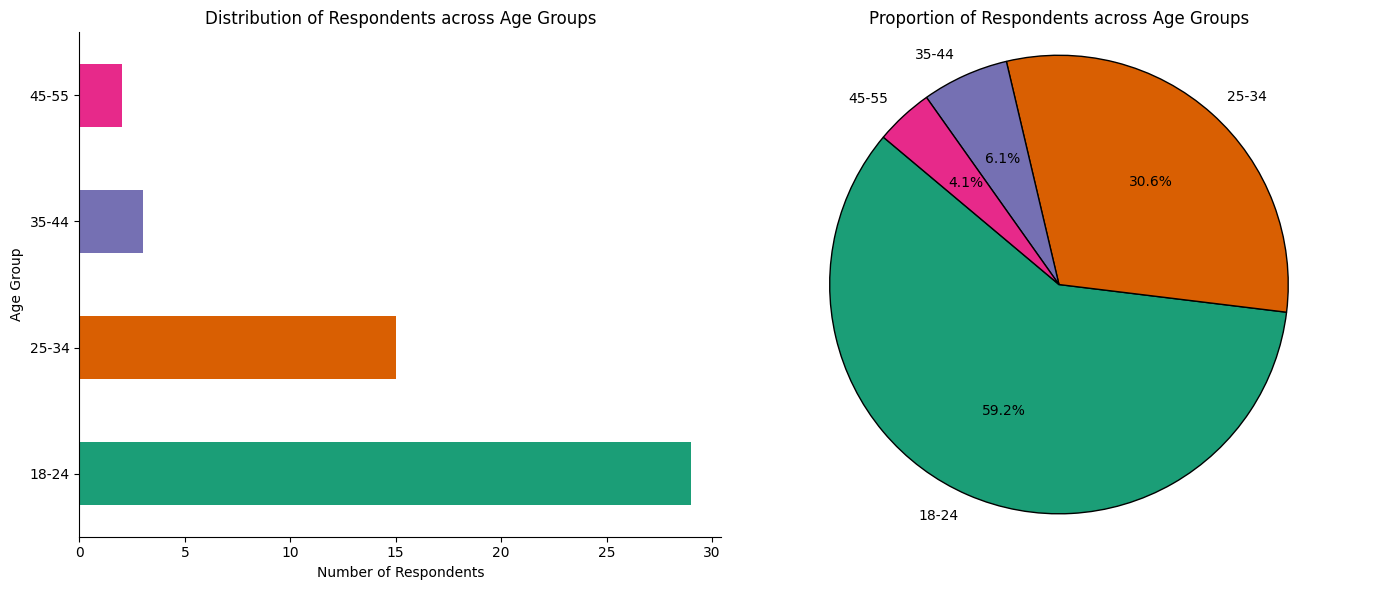

In [42]:
# @title 1.1 Age Group Distribution

# Calculate the counts for each age group
age_group_counts = consumer_df.groupby('age-group').size()

# Setting up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting bar chart
consumer_df.groupby('age-group').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=ax1)
ax1.set_title('Distribution of Respondents across Age Groups')
ax1.set_xlabel('Number of Respondents')
ax1.set_ylabel('Age Group')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Plotting pie chart
ax2.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Dark2'), wedgeprops={'edgecolor': 'black'})
ax2.set_title('Proportion of Respondents across Age Groups')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.tight_layout()
plt.show()

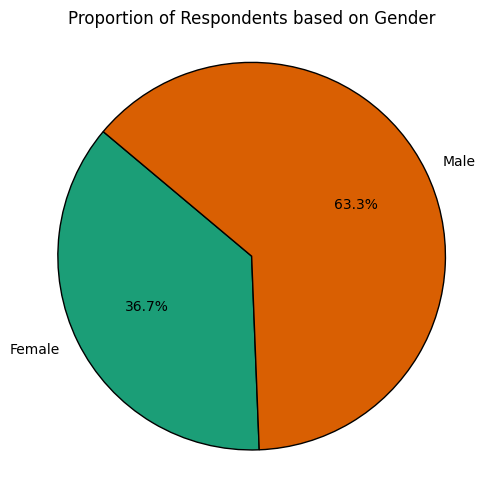

In [43]:
# @title 2. Geneder Distribution

# Calculate the counts for gender
gender_counts = consumer_df.groupby('gender').size()

# Plotting pie chart
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Dark2'), wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Respondents based on Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.tight_layout()
plt.show()

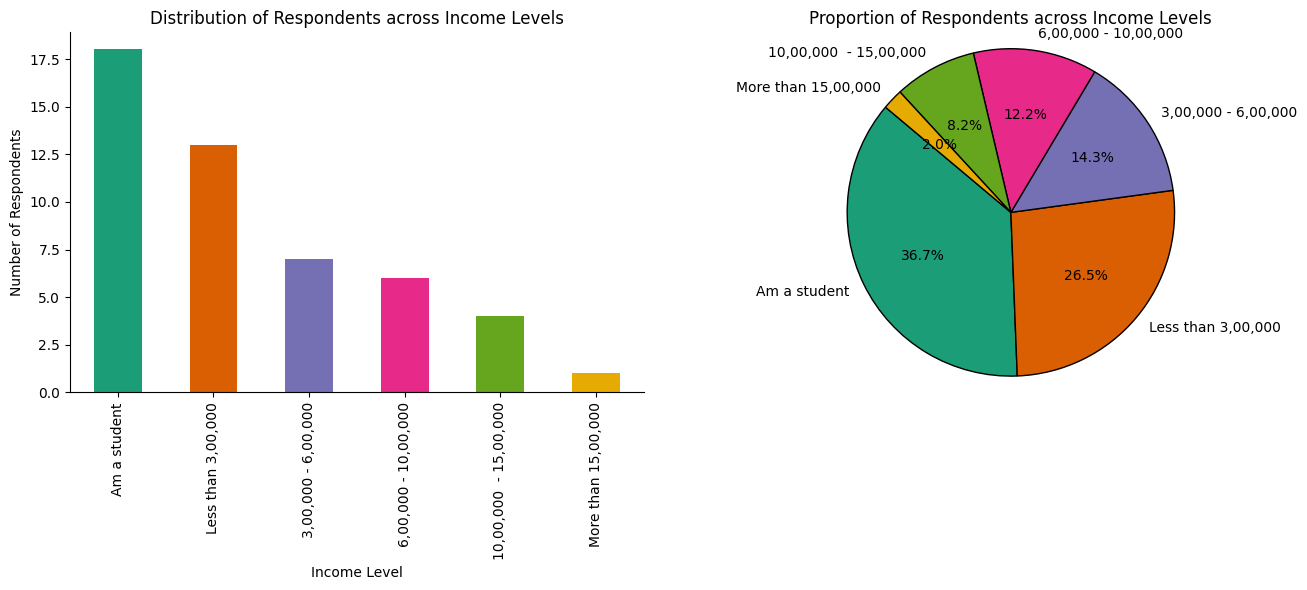

In [44]:
# @title 3. Income Distribution

# Count the occurrences of each income range
income_range_counts = consumer_df['Income'].value_counts()

# Setting up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting bar chart (histogram-like) for income levels
income_range_counts.plot(kind='bar', color=sns.color_palette('Dark2'), ax=ax1)
ax1.set_title('Distribution of Respondents across Income Levels')
ax1.set_xlabel('Income Level')
ax1.set_ylabel('Number of Respondents')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Plotting pie chart for income levels
ax2.pie(income_range_counts, labels=income_range_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Dark2'), wedgeprops={'edgecolor': 'black'})
ax2.set_title('Proportion of Respondents across Income Levels')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.tight_layout()
plt.show()

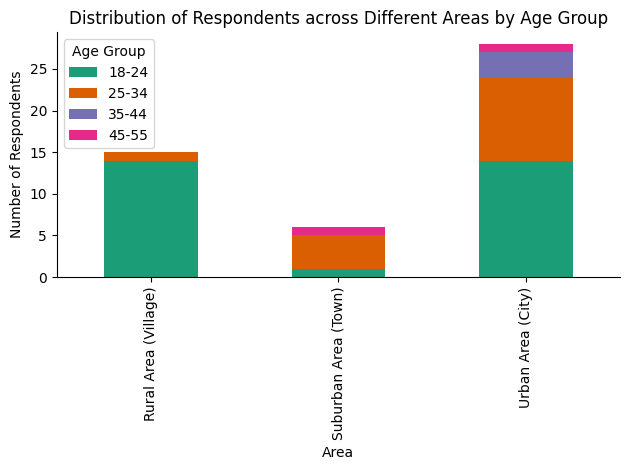

In [45]:
# @title Regional Analysis

# Create a pivot table to count occurrences of each age group in each area
pivot_df = consumer_df.pivot_table(index='area', columns='age-group', aggfunc='size', fill_value=0)

# Plotting the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, color=sns.color_palette('Dark2'))

plt.title('Distribution of Respondents across Different Areas by Age Group')
plt.xlabel('Area')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

<ipython-input-46-7d38d4eaa834>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='vehicle_type', data=vehicle_counts, palette='Dark2')


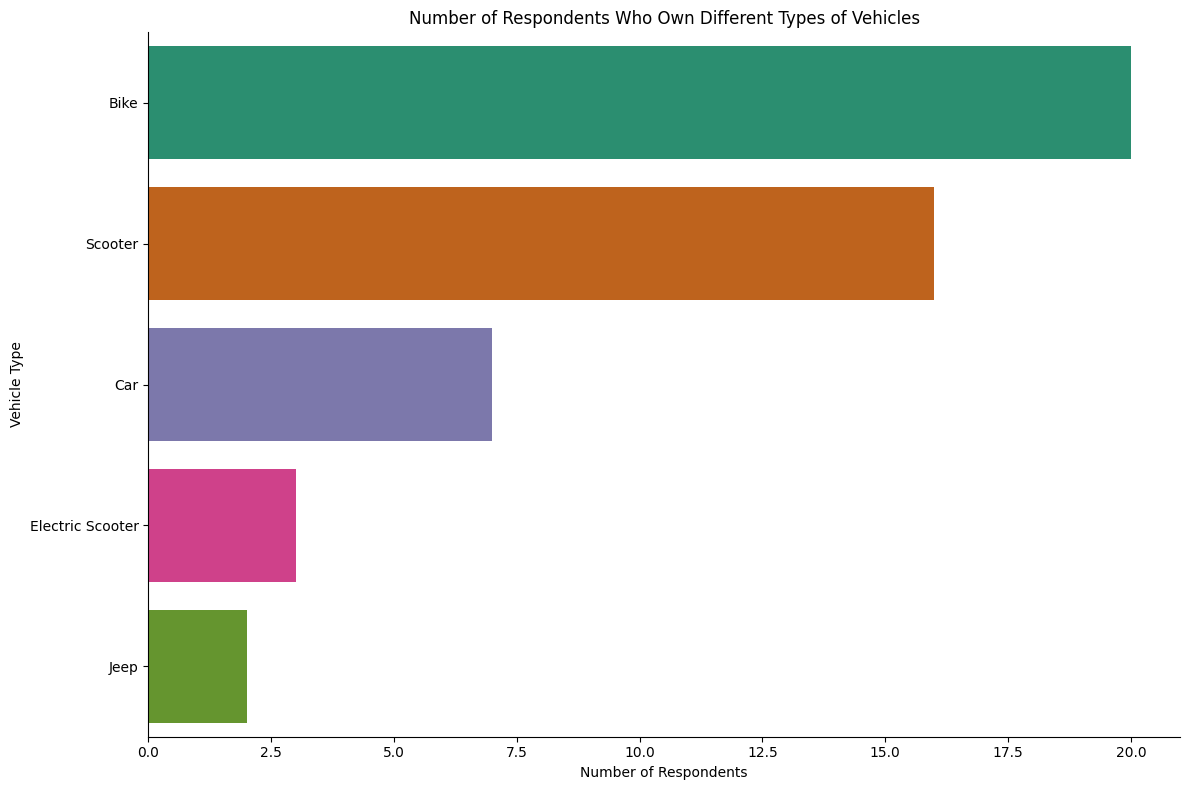

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Vehicle data
vehicle_data = [
    "Scooter, Bike", "Bike", "Car", "Scooter", "Car", "Scooter", "Bike, Car", "Scooter, Bike",
    "Scooter", "Scooter", "Scooter", "Electric Scooter", "Scooter, Bike, Car", "Bike", "Bike",
    "Jeep", "Bike", "Scooter", "", "Bike", "Scooter", "", "Bike", "Bike, Car", "Bike", "",
    "Scooter", "", "", "Scooter", "", "", "Scooter", "Bike, Car", "Scooter", "Bike", "Bike",
    "Bike", "Scooter, Bike, Electric Scooter, Car, Jeep", "Scooter", "Bike", "Bike",
    "Electric Scooter", "Bike"
]

# Create a DataFrame
vehicle_df = pd.DataFrame(vehicle_data, columns=['vehicle_type'])

# Split multiple vehicle types into separate rows
vehicle_data = vehicle_df['vehicle_type'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
vehicle_data.name = 'vehicle_type'

# Strip any leading/trailing spaces
vehicle_data = vehicle_data.str.strip()

# Filter out empty strings
vehicle_data = vehicle_data[vehicle_data != '']

# Count occurrences
vehicle_counts = vehicle_data.value_counts().reset_index()
vehicle_counts.columns = ['vehicle_type', 'count']

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='vehicle_type', data=vehicle_counts, palette='Dark2')

plt.title('Number of Respondents Who Own Different Types of Vehicles')
plt.xlabel('Number of Respondents')
plt.ylabel('Vehicle Type')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


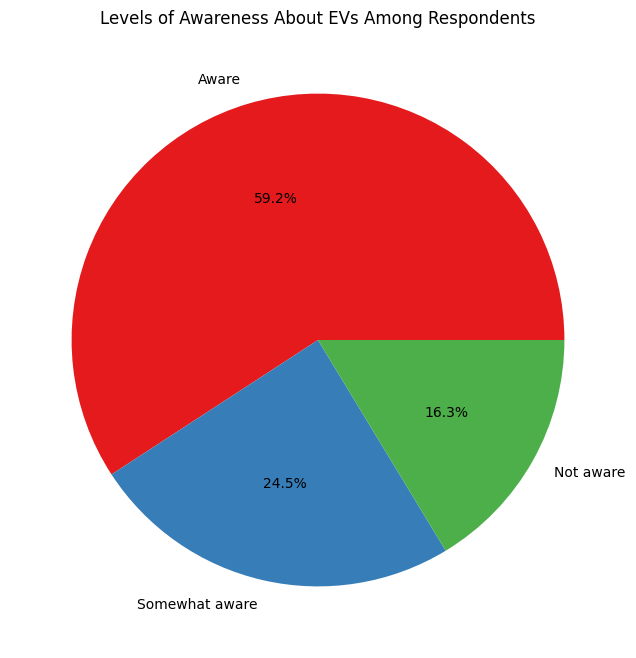

In [47]:
# Counting occurrences of each awareness level
awareness_counts = consumer_df['ev-awareness'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
awareness_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set1'))

plt.title('Levels of Awareness About EVs Among Respondents')
plt.ylabel('')  # Hide the y-label
plt.show()

<Figure size 1000x600 with 0 Axes>

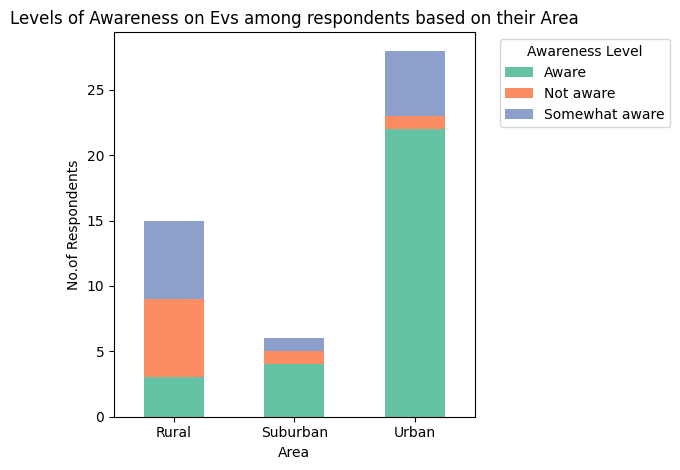

In [48]:
# Counting occurrences of each interest level by age group
awareness_counts = consumer_df.groupby(['area', 'ev-awareness']).size().unstack(fill_value=0)


# Renaming the index (areas) to your desired names
awareness_counts.index = ['Rural', 'Suburban', 'Urban']

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
awareness_counts.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'))


plt.title('Levels of Awareness on Evs among respondents based on their Area')
plt.xlabel('Area')
plt.ylabel('No.of Respondents')

plt.xticks(rotation=0)
plt.legend(title='Awareness Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [49]:
awareness_counts

ev-awareness,Aware,Not aware,Somewhat aware
Rural,3,6,6
Suburban,4,1,1
Urban,22,1,5


<Figure size 1000x600 with 0 Axes>

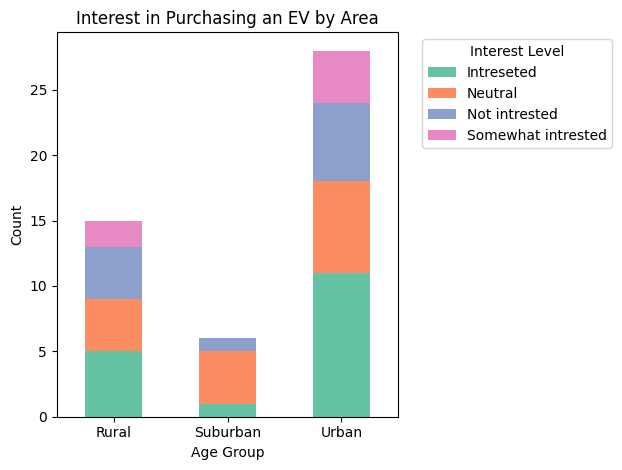

In [50]:
# Counting occurrences of each interest level by age group
interest_counts = consumer_df.groupby(['area', 'intrest-to-purchase']).size().unstack(fill_value=0)

# Renaming the index (areas) to your desired names
interest_counts.index = ['Rural', 'Suburban', 'Urban']

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
interest_counts.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'))

plt.title('Interest in Purchasing an EV by Area')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.xticks(rotation=0)
plt.legend(title='Interest Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

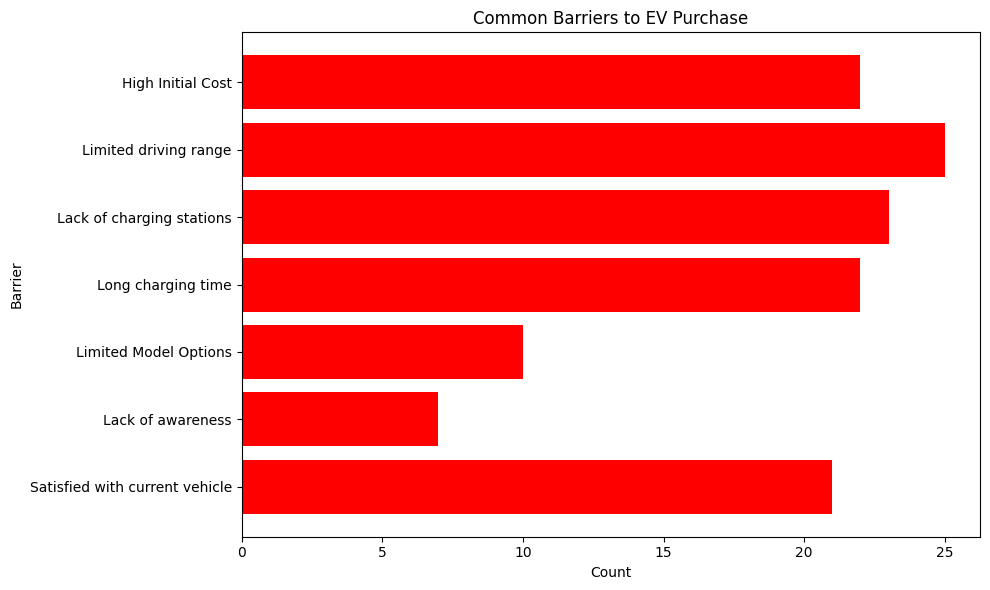

In [51]:
# Function to count occurrences of each barrier
def count_barriers(df):
    barrier_counts = Counter()
    for barriers_str in df['purchase-barriers']:
        barriers = [b.strip() for b in barriers_str.split(',')]
        barrier_counts.update(barriers)
    return barrier_counts

# Counting barriers
barrier_counts = count_barriers(consumer_df)

# Define the sequence of barriers as per your requirement
barrier_names = [
    'High Initial Cost',
    'Limited driving range',
    'Lack of charging stations',
    'Long charging time',
    'Limited Model Options',
    'Lack of awareness',
    'Satisfied with current vehicle'
]

# Filter and sort the barrier counts according to the specified sequence
sorted_barrier_counts = [barrier_counts[name] for name in barrier_names]

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(barrier_names, sorted_barrier_counts, color='red')
plt.xlabel('Count')
plt.ylabel('Barrier')
plt.title('Common Barriers to EV Purchase')

plt.gca().invert_yaxis()  # Invert y-axis to have the highest barrier at the top

plt.tight_layout()
plt.show()

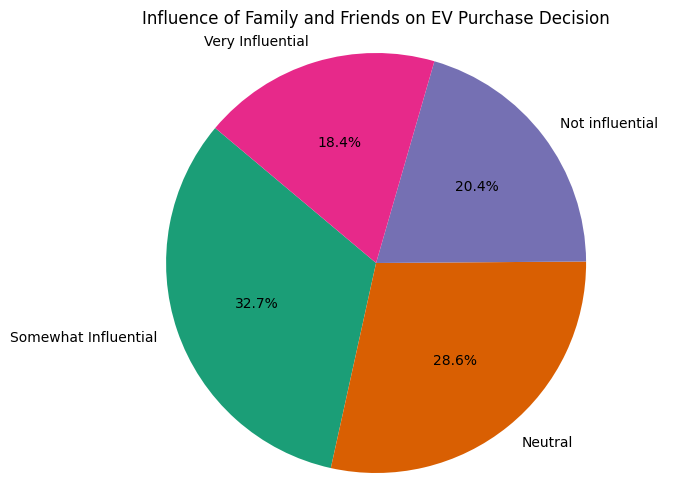

In [52]:
# Counting the values
influence_counts = consumer_df['family-friends-influence'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(influence_counts.values, labels=influence_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Dark2.colors)
plt.title('Influence of Family and Friends on EV Purchase Decision')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

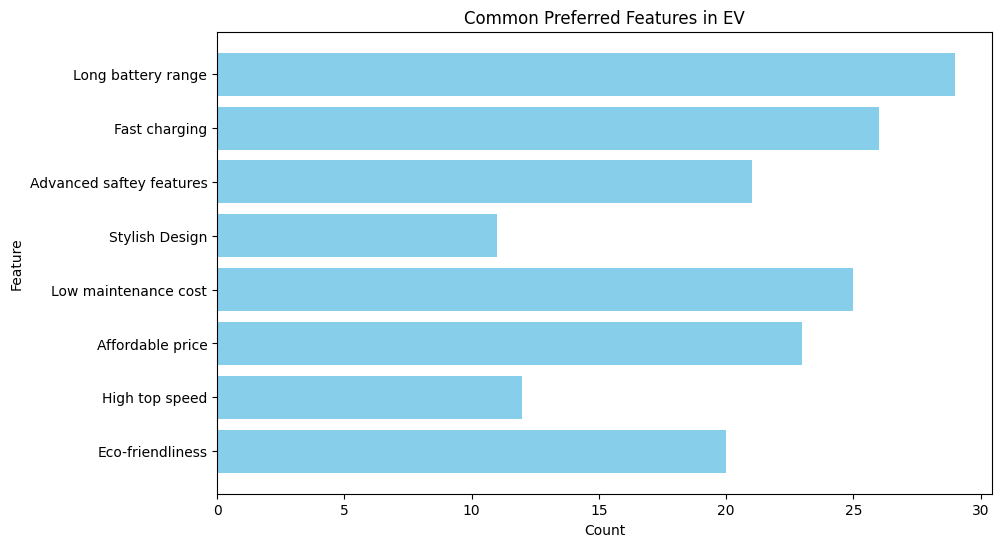

In [53]:
# Function to count occurrences of each feature
def count_features(df):
    feature_counts = Counter()
    for features_str in df['preferred-features'].dropna():
        features = [f.strip() for f in features_str.split(',')]
        feature_counts.update(features)
    return feature_counts

# Counting features
preferred_feature_counts = count_features(consumer_df)

# Define the sequence of features as per your requirement
feature_names = ['Long battery range', 'Fast charging', 'Advanced saftey features', 'Stylish Design',
                 'Low maintenance cost', 'Affordable price', 'High top speed', 'Eco-friendliness']

# Filter and sort the feature counts according to the specified sequence
sorted_feature_counts = [preferred_feature_counts.get(name, 0) for name in feature_names]

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, sorted_feature_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Feature')
plt.title('Common Preferred Features in EV')

plt.gca().invert_yaxis()  # Invert

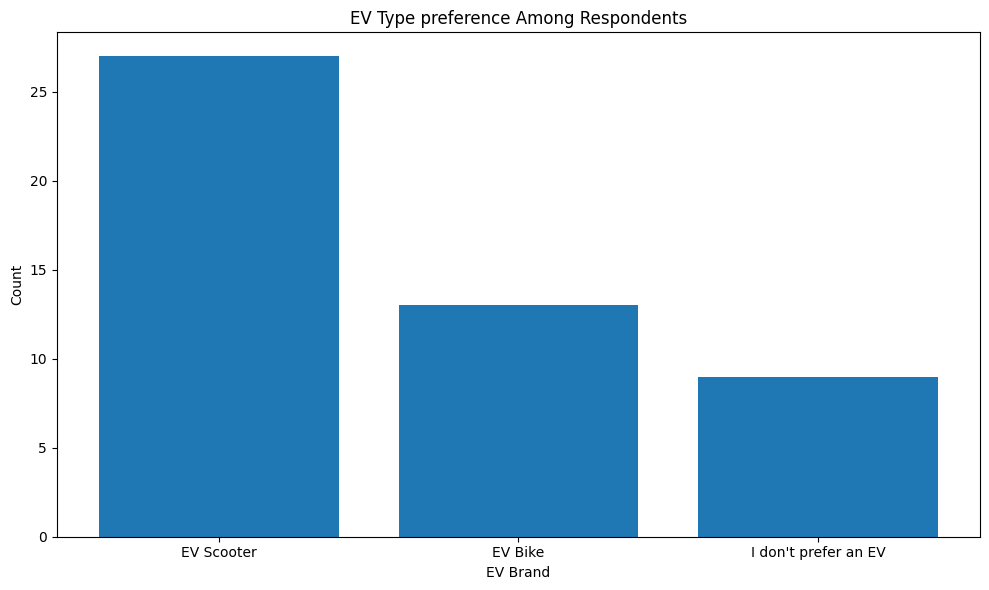

In [54]:
# Function to count occurrences of each EV brand
def count_brands(df):
    brand_counts = Counter()
    for brand in df['ev-type-preference'].dropna():
        brand_counts.update([brand.strip()])
    return brand_counts

# Counting brands
brand_counts = count_brands(consumer_df)

# Convert the brand counts to two lists for plotting
brands = list(brand_counts.keys())
counts = list(brand_counts.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(brands, counts)
plt.xlabel('EV Brand')
plt.ylabel('Count')
plt.title('EV Type preference Among Respondents')

plt.tight_layout()
plt.show()

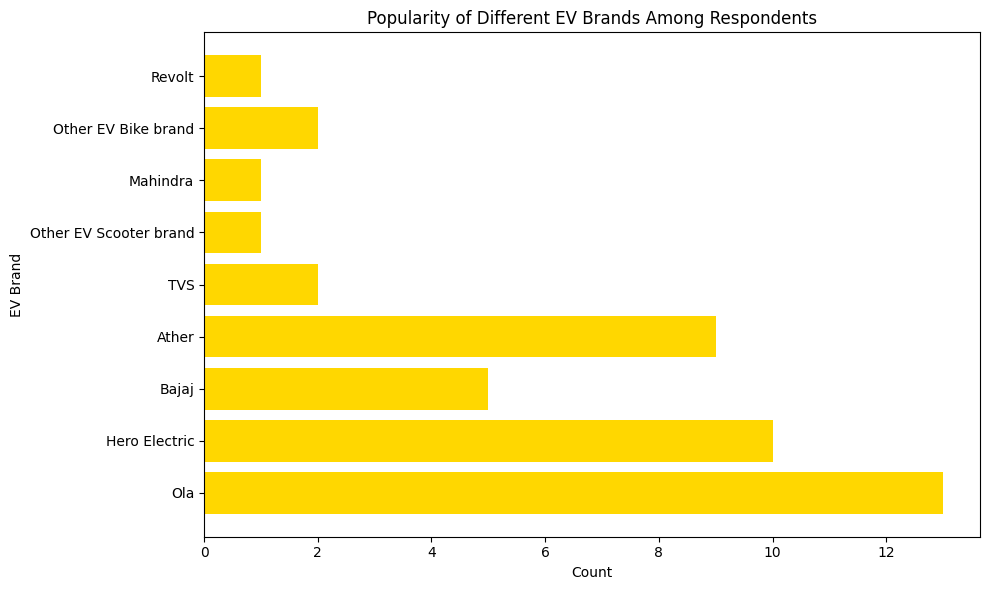

In [55]:
# Function to count occurrences of each EV brand
def count_brands(df):
    brand_counts = Counter()
    for brand in df['preferred-brand'].dropna():
        brand_counts.update([brand.strip()])
    return brand_counts

# Counting brands
brand_counts = count_brands(consumer_df)

# Convert the brand counts to two lists for plotting
brands = list(brand_counts.keys())
counts = list(brand_counts.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(brands, counts, color='gold')
plt.xlabel('Count')
plt.ylabel('EV Brand')
plt.title('Popularity of Different EV Brands Among Respondents')

plt.tight_layout()
plt.show()

<ipython-input-56-4a1b736f76bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=budget_counts.index, y=budget_counts.values, palette='viridis')


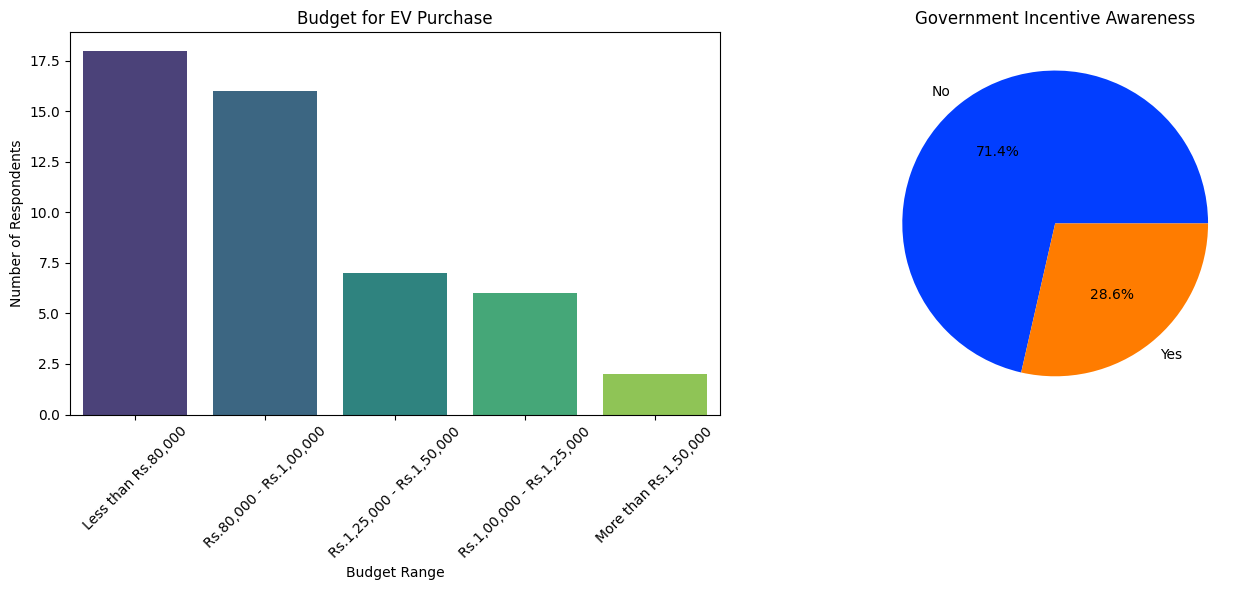

In [56]:
# Bar Chart for Budget
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
budget_counts = consumer_df['budget'].value_counts()
sns.barplot(x=budget_counts.index, y=budget_counts.values, palette='viridis')
plt.title('Budget for EV Purchase')
plt.xlabel('Budget Range')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)

# Pie Chart for Government Incentive Awareness
plt.subplot(1, 2, 2)
awareness_counts = consumer_df['govt-incentive-awareness'].value_counts()
plt.pie(awareness_counts, labels=awareness_counts.index, autopct='%1.1f%%', colors=sns.color_palette('bright', len(awareness_counts)))
plt.title('Government Incentive Awareness')

plt.tight_layout()
plt.show()

<ipython-input-57-42bd57526665>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=belief_counts.index, y=belief_counts.values, palette='coolwarm')


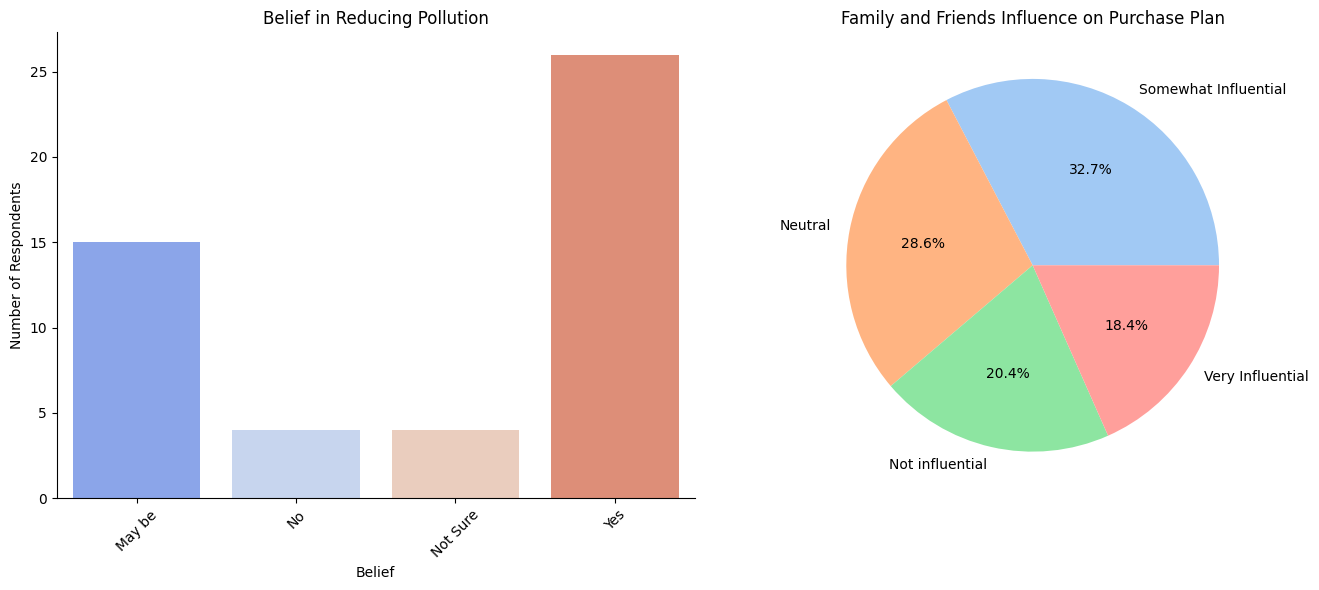

In [57]:
# Plot
plt.figure(figsize=(14, 6))

# Bar Chart for Belief in Reducing Pollution
plt.subplot(1, 2, 1)
belief_counts = consumer_df['belief-in-reducing-pollution'].value_counts().sort_index()
sns.barplot(x=belief_counts.index, y=belief_counts.values, palette='coolwarm')
plt.title('Belief in Reducing Pollution')
plt.xlabel('Belief')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)

# Pie Chart for Family and Friends Influence
plt.subplot(1, 2, 2)
influence_counts = consumer_df['family-friends-influence'].value_counts()
plt.pie(influence_counts, labels=influence_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel', len(influence_counts)))
plt.title('Family and Friends Influence on Purchase Plan')

plt.tight_layout()
plt.show()

<ipython-input-58-a1f61c098e1f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purchase-plan', data=consumer_df, palette='viridis')


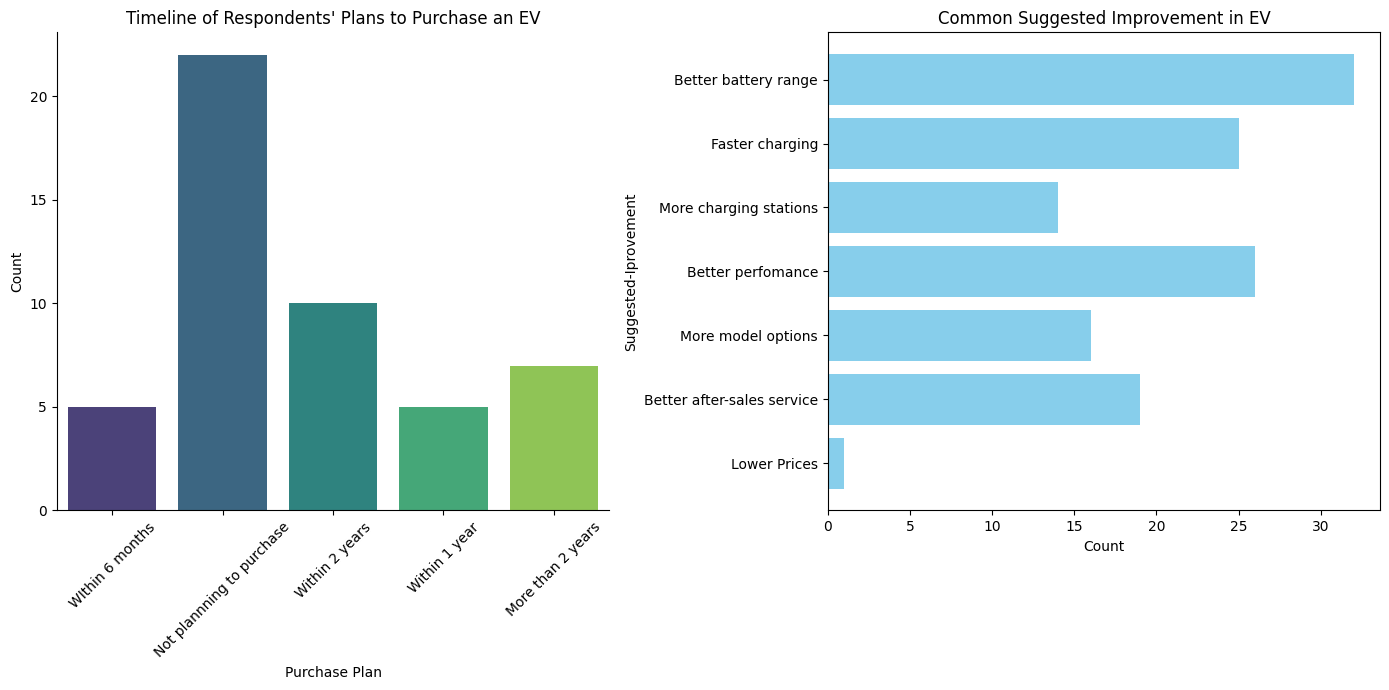

In [58]:
# Plotting the Stacked Bar Chart for Purchase Plans
plt.figure(figsize=(14, 7))

# Stacked Bar Chart
plt.subplot(1, 2, 1)
sns.countplot(x='purchase-plan', data=consumer_df, palette='viridis')
plt.title('Timeline of Respondents\' Plans to Purchase an EV')
plt.xlabel('Purchase Plan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)

# Horizontal Bar Chart for Suggested Improvements
plt.subplot(1, 2, 2)
# Function to count occurrences of each feature
def count_suggested_improvements(df):
    improvement_counts = Counter()
    for improvements_str in df['suggested-improvements'].dropna():
        improvements = [f.strip() for f in improvements_str.split(',')]
        improvement_counts.update(improvements)
    return improvement_counts

# Counting features
suggested_improvement_counts = count_suggested_improvements(consumer_df)

# Define the sequence of features as per your requirement
feature_names = ['Better battery range','Faster charging','More charging stations','Better perfomance',
'More model options','Better after-sales service','More charging stations','Lower Prices']

# Filter and sort the feature counts according to the specified sequence
sorted_feature_counts = [suggested_improvement_counts.get(name, 0) for name in feature_names]

plt.barh(feature_names, sorted_feature_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Suggested-Iprovement')
plt.title('Common Suggested Improvement in EV')

plt.gca().invert_yaxis()  # Invert

plt.tight_layout()
plt.show()

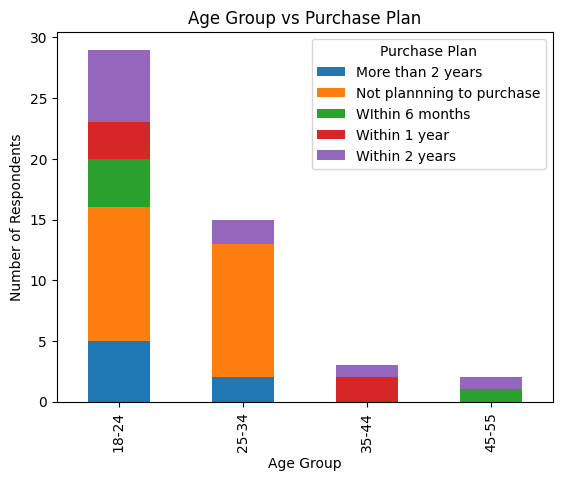

In [59]:
grouped_data = consumer_df.groupby(['age-group', 'purchase-plan']).size().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.title('Age Group vs Purchase Plan')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Purchase Plan')
plt.show()

In [60]:
# Ordinal columns to be label encoded
ordinal_columns = ['age-group', 'Income','gender', 'demography', 'area', 'vehicle-ownership', 'ev-awareness', 'intrest-to-purchase', 'preferred-brand', 'ev-type-preference', 'govt-incentive-awareness', 'environmental-impact', 'belief-in-reducing-pollution', 'family-friends-influence', 'purchase-plan', 'budget']

# Create a label encoder object
le = LabelEncoder()

# Apply label encoder to each column
for col in ordinal_columns:
    consumer_df[col] = le.fit_transform(consumer_df[col])

# Display the encoded dataframe
print(consumer_df.head())


   age-group  gender  Income  demography  area  vehicle-ownership  \
0          0       1       3           3     2                  1   
1          0       1       3           3     0                  0   
2          1       0       4           1     1                  0   
3          0       1       4           3     2                  0   
4          3       1       2           3     2                  1   

        vehicles  ev-awareness  intrest-to-purchase  \
0  Scooter, Bike             0                    0   
1           Bike             2                    3   
2            Car             2                    1   
3        Scooter             0                    2   
4            Car             0                    0   

                                   purchase-barriers  ... ev-type-preference  \
0  Long charging time, Lack of awareness, Satisfi...  ...                  1   
1                     Satisfied with current vehicle  ...                  1   
2             

In [61]:
# Columns with multiple values (checkboxes)
multi_select_columns = ['vehicles', 'purchase-barriers', 'preferred-features', 'suggested-improvements']

for col in multi_select_columns:
    # Ensure the column is treated as a string
    consumer_df[col] = consumer_df[col].astype(str)
    # Split the column into multiple binary columns
    dummy_df = consumer_df[col].str.get_dummies(sep=', ')
    # Prefix the column names to avoid collisions
    dummy_df = dummy_df.add_prefix(f'{col}_')
    # Concatenate the dummy columns with the main dataframe
    consumer_df = pd.concat([consumer_df, dummy_df], axis=1)
    # Drop the original multi-select column
    #consumer_df.drop(col, axis=1, inplace=True)

# Display the dataframe after transformation
print(consumer_df.head())

   age-group  gender  Income  demography  area  vehicle-ownership  \
0          0       1       3           3     2                  1   
1          0       1       3           3     0                  0   
2          1       0       4           1     1                  0   
3          0       1       4           3     2                  0   
4          3       1       2           3     2                  1   

        vehicles  ev-awareness  intrest-to-purchase  \
0  Scooter, Bike             0                    0   
1           Bike             2                    3   
2            Car             2                    1   
3        Scooter             0                    2   
4            Car             0                    0   

                                   purchase-barriers  ...  \
0  Long charging time, Lack of awareness, Satisfi...  ...   
1                     Satisfied with current vehicle  ...   
2                                  High Initial Cost  ...   
3  High In

In [62]:
selected_columns = ['age-group', 'gender', 'Income', 'area',
       'vehicle-ownership','ev-awareness', 'intrest-to-purchase',
                     'ev-type-preference', 'budget', 'govt-incentive-awareness',
       'environmental-impact', 'belief-in-reducing-pollution',
       'family-friends-influence', 'purchase-plan','overall-survey-experience', 'vehicles_Bike',
       'vehicles_Electric Scooter',
       'vehicles_Scooter', 'vehicles_nan',
       'purchase-barriers_High Initial Cost',
       'purchase-barriers_Lack of awareness',
       'purchase-barriers_Lack of charging stations',
       'purchase-barriers_Limited Model Options',
       'purchase-barriers_Limited driving range',
       'purchase-barriers_Long charging time',
       'purchase-barriers_Satisfied with current vehicle',
       'preferred-features_Advanced saftey features',
       'preferred-features_Affordable price',
       'preferred-features_Eco-friendliness',
       'preferred-features_Fast charging', 'preferred-features_High top speed',
       'preferred-features_Long battery range',
       'preferred-features_Low maintenance cost',
       'preferred-features_Stylish Design', 'preferred-features_nan',
       'suggested-improvements_Better after-sales service',
       'suggested-improvements_Better battery range',
       'suggested-improvements_Better perfomance',
       'suggested-improvements_Faster charging',
       'suggested-improvements_Lower Prices',
       'suggested-improvements_More charging stations',
       'suggested-improvements_More charging ststions',
       'suggested-improvements_More model options']


In [63]:
# @title PCA
X = consumer_df[selected_columns]
# Initialize PCA with desired number of components
pca = PCA(n_components=2)  # Adjust n_components as per your requirement
X_pca = pca.fit_transform(X)

# Clustering

In [64]:
# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

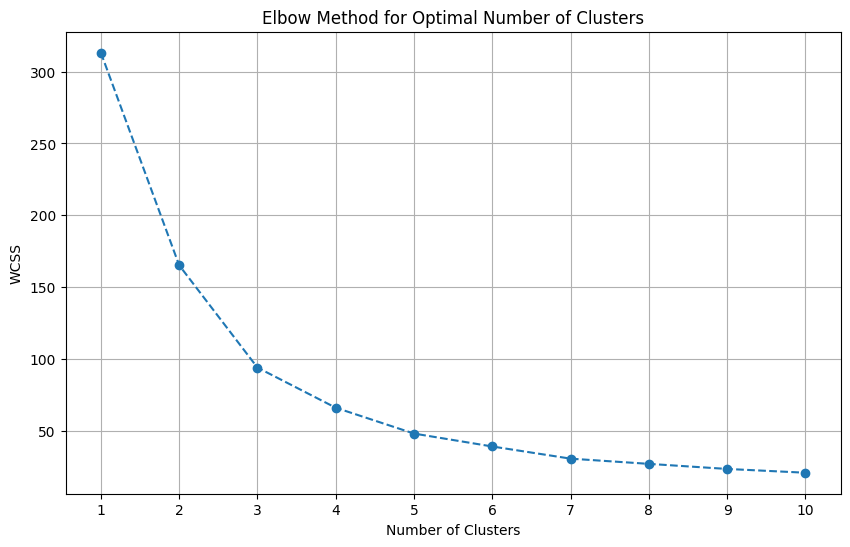

In [65]:
# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [66]:
# @title taking k = 4

optimal_k = 4  # Example optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X_pca)

# Get cluster labels
labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


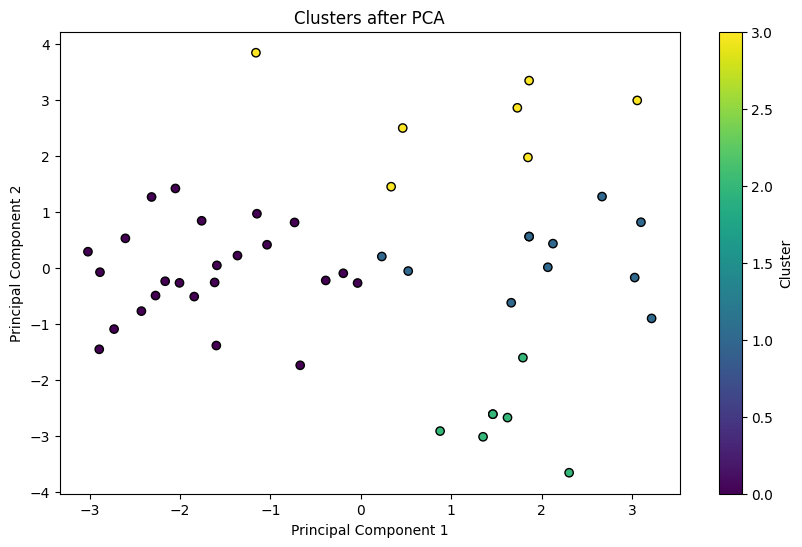

In [67]:
# Visualize clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.title('Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Dataset 2

In [68]:
ev_df.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time (Hr),Price (INR),Power (kW),Top Speed (kmph),Year of Manufacture
0,1,Ola Electric S1 Pro,Ola Electric,Scooter,4.00,181,6.5,140000,11.0,120,2023
1,2,TVS iQube,TVS,Scooter,3.04,75,5.0,100000,4.4,78,2022
2,3,Ola Electric S1 X,Ola Electric,Scooter,3.00,141,5.5,99999,8.5,95,2023
3,4,Revolt RV400,Revolt,Bike,3.24,150,4.5,124999,3.0,85,2022
4,5,Ultraviolette F77,Ultraviolette,Bike,4.20,307,1.5,350000,33.5,147,2023


In [69]:
ev_df.columns

Index(['id', 'Model', 'Manufacturer', 'Vehicle Type', 'Battery Capacity (kWh)',
       'Range per Charge (km)', 'Charging Time (Hr)', 'Price (INR)',
       'Power (kW)', 'Top Speed (kmph)', 'Year of Manufacture'],
      dtype='object')

In [70]:
ev_df.describe()

,id,Battery Capacity (kWh),Range per Charge (km),Charging Time (Hr),Price (INR),Power (kW),Top Speed (kmph),Year of Manufacture
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,3.853667,145.333333,4.826667,155636.766667,8.074667,91.100000,2022.633333
std,8.803408,1.474600,45.203245,1.411268,55824.464485,7.358720,25.441413,1.033352
min,1.000000,1.440000,75.000000,1.500000,96250.000000,1.200000,25.000000,2020.000000
25%,8.250000,3.000000,120.000000,4.500000,124999.000000,4.075000,80.000000,2022.000000
50%,15.500000,3.700000,142.000000,5.000000,145000.000000,6.000000,90.000000,2022.000000
75%,22.750000,4.150000,161.250000,5.500000,167500.000000,8.580000,100.000000,2024.000000
max,30.000000,9.000000,307.000000,8.300000,350000.000000,33.500000,147.000000,2024.000000


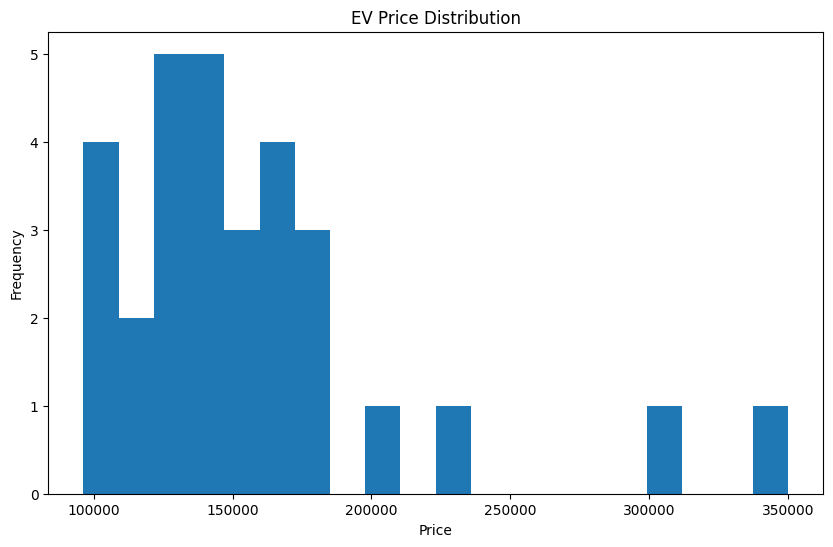

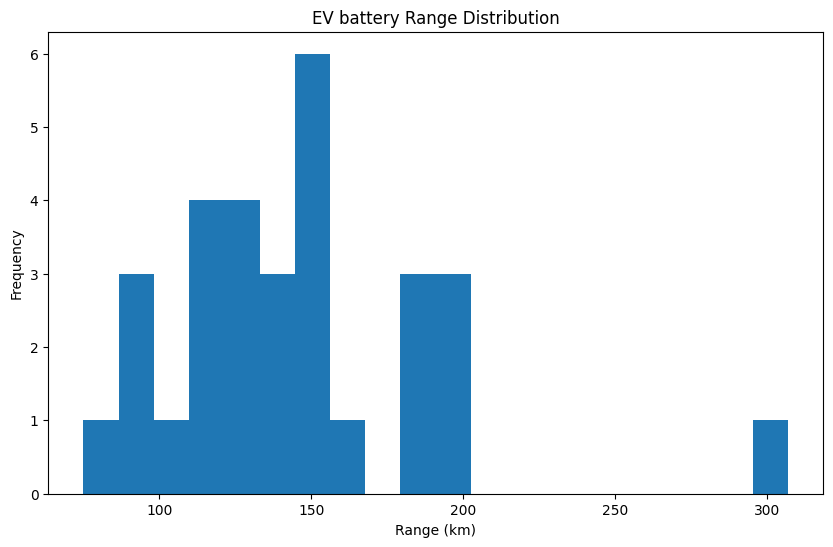

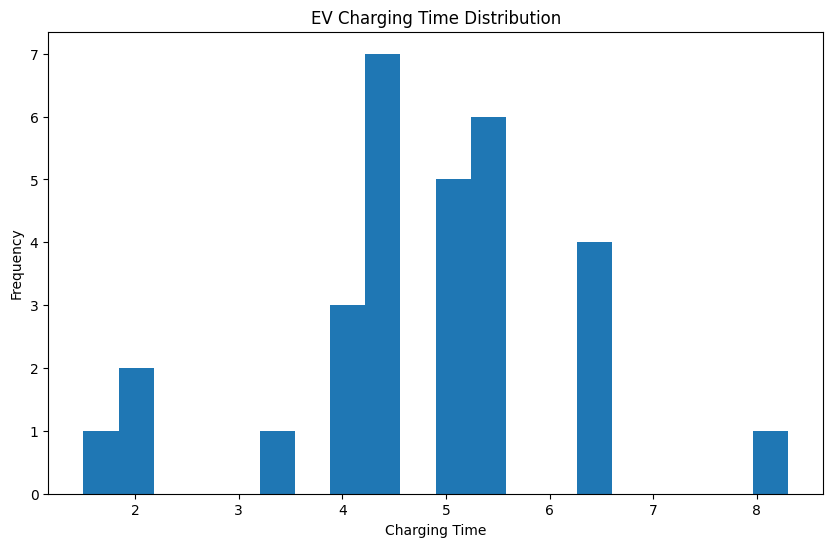

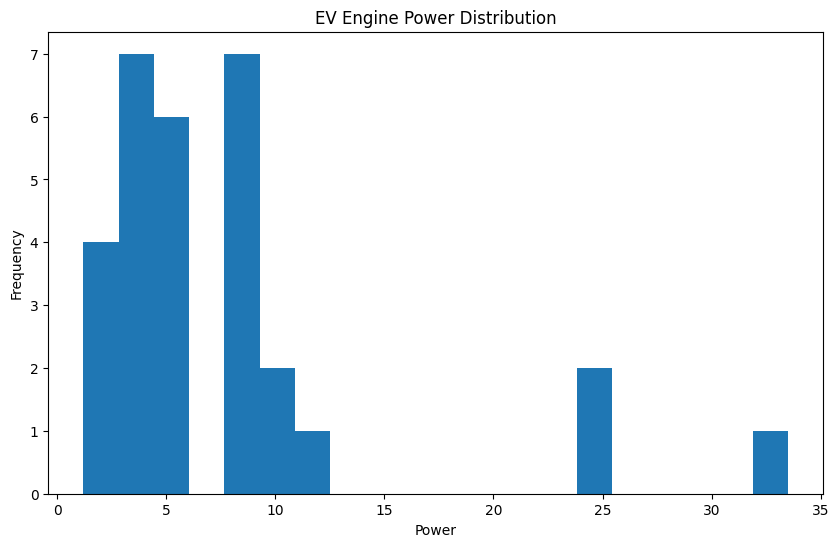

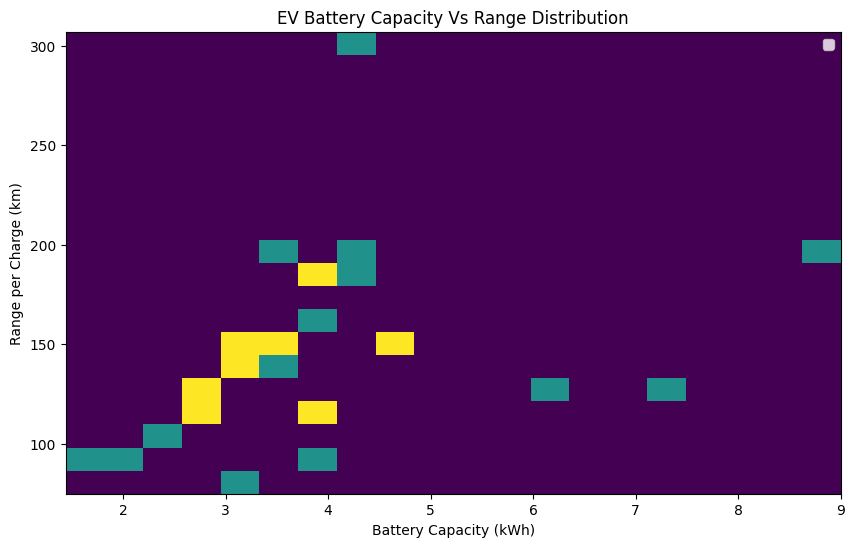

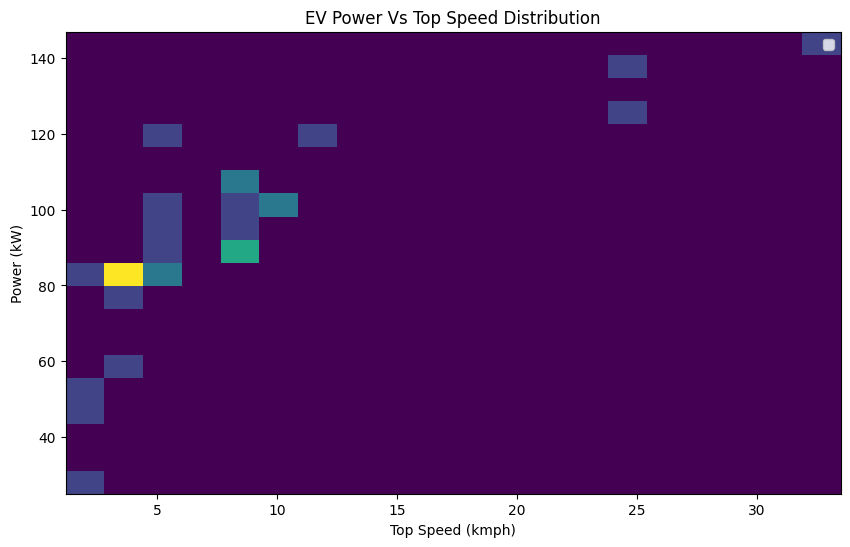

In [74]:
plt.figure(figsize=(10,6))
plt.hist(ev_df['Price (INR)'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('EV Price Distribution')

plt.figure(figsize=(10,6))
plt.hist(ev_df['Range per Charge (km)'], bins=20)
plt.xlabel('Range (km)')
plt.ylabel('Frequency')
plt.title('EV battery Range Distribution')

plt.figure(figsize=(10,6))
plt.hist(ev_df['Charging Time (Hr)'], bins=20)
plt.xlabel('Charging Time')
plt.ylabel('Frequency')
plt.title('EV Charging Time Distribution')

plt.figure(figsize=(10,6))
plt.hist(ev_df['Power (kW)'], bins=20)
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.title('EV Engine Power Distribution')

plt.figure(figsize=(10,6))
plt.hist2d(ev_df['Battery Capacity (kWh)'],ev_df['Range per Charge (km)'], bins=20)
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range per Charge (km)')
plt.legend(loc='best')
plt.title('EV Battery Capacity Vs Range Distribution')

plt.figure(figsize=(10,6))
plt.hist2d(ev_df['Power (kW)'],ev_df['Top Speed (kmph)'], bins=20)
plt.ylabel('Power (kW)')
plt.xlabel('Top Speed (kmph)')
plt.legend(loc='best')
plt.title('EV Power Vs Top Speed Distribution')
plt.show()

# Other potential analyses: battery capacity vs. range, power vs. top speed, etc.


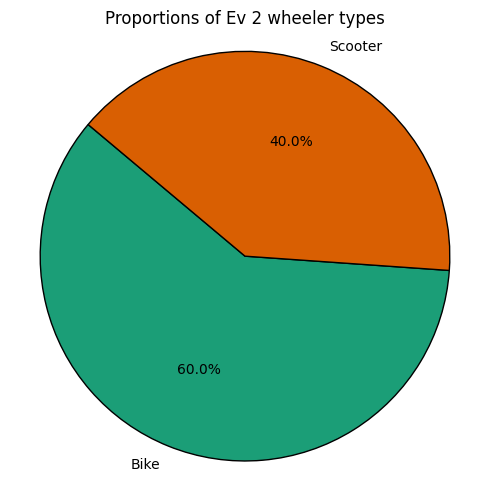

In [72]:
# Calculate the counts for gender
gender_counts = ev_df.groupby('Vehicle Type').size()

# Plotting pie chart
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Dark2'), wedgeprops={'edgecolor': 'black'})
plt.title('Proportions of Ev 2 wheeler types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.tight_layout()
plt.show()

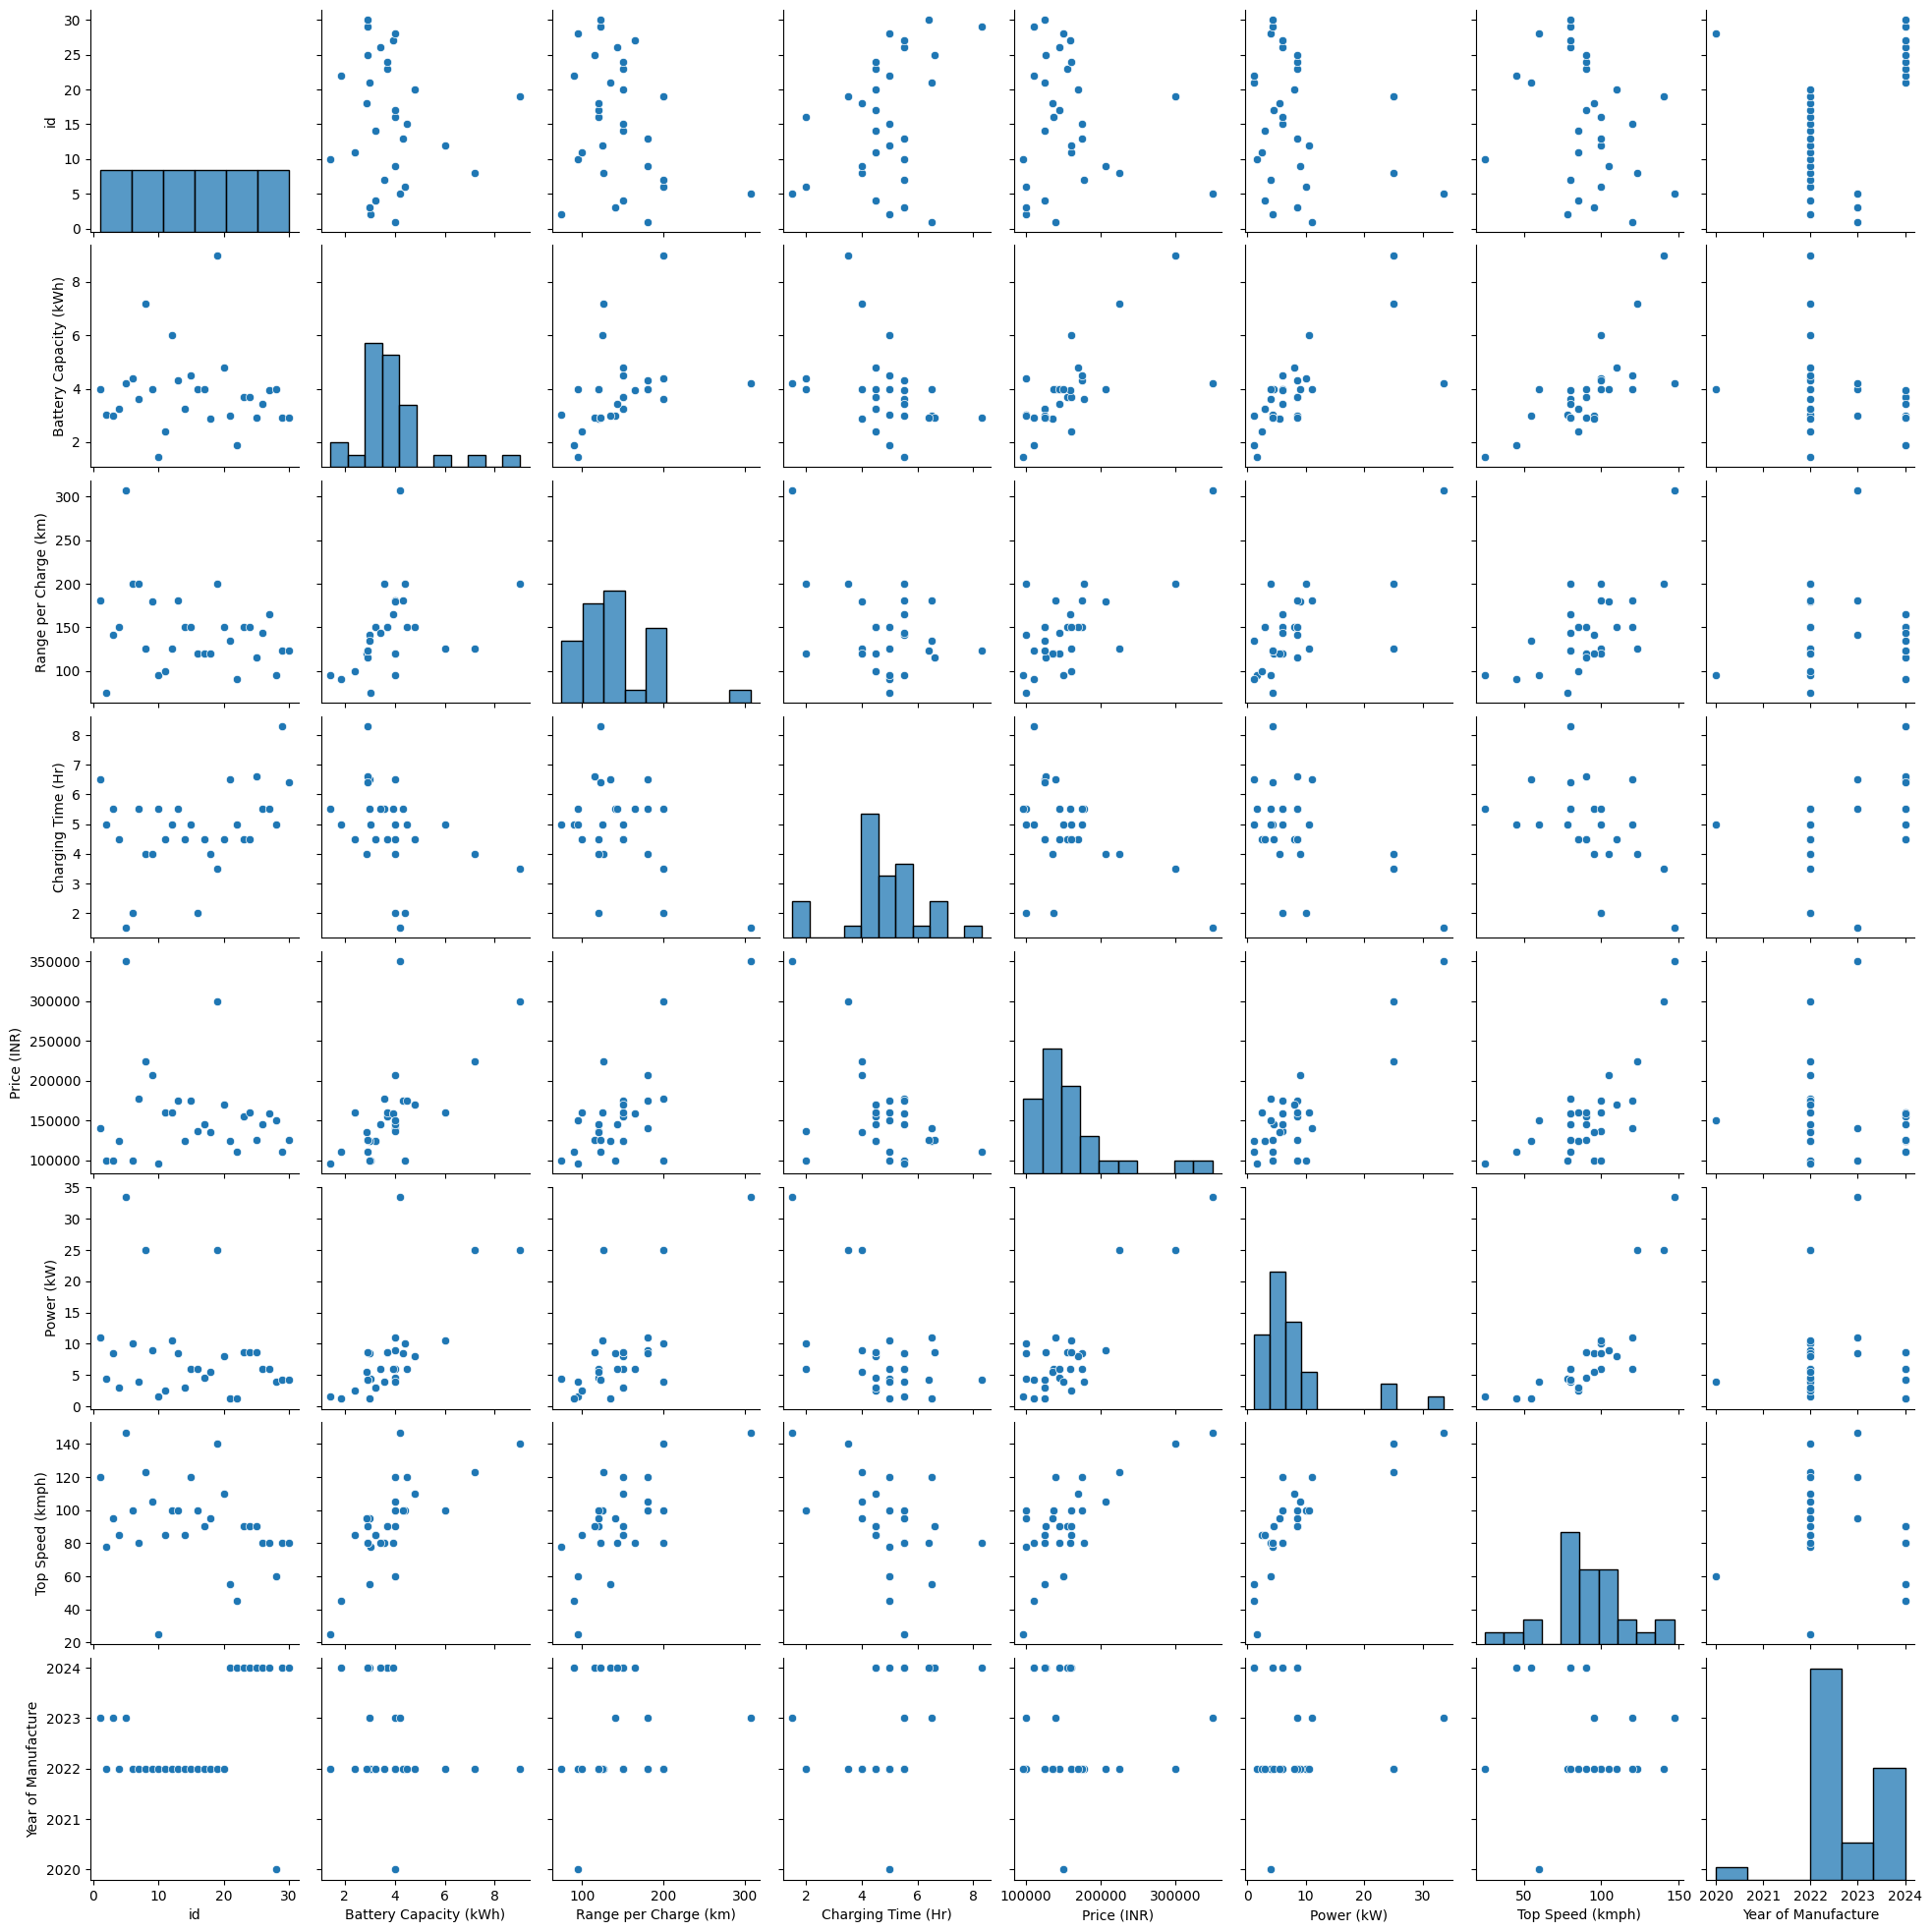

In [73]:
sns.pairplot(ev_df)